In [26]:
%reset -f

# 🌟 Assignment 2. Operation "AI GeoGuessr"

### Deadline: Monday, October 21, 2024, 11:59:00 PM CET (GMT +2)

## 🎯 Mission Overview

The operation consists of two independent missions. Similar to the previous operation, students are required to solve the tasks by achieving the required score and answering the follow-up questions.

## 🧪 Neural Networks and Unsupervised Learning

1. **Mission 2.1 (Supervised Learning)**: 
   - Solve a supervised learning problem using a Neural Network (MLP). This is similar to a problem you have worked on before but requires the use of a neural network model.

2. **Mission 2.2 (Unsupervised Learning)**:
   - Given an unlabeled dataset, your task is to cluster similar data points and achieve 100% clustering accuracy. You will not have access to the true labels, but you can verify your cluster assignments using the Kaggle competition provided.

## 📝 Delivery Format (Blackboard)

Please submit **two files**:
1. The completed Jupyter notebook.
2. The solution for the second dataset as a CSV file with two `int` columns: `['ID', 'cluster']`.

## Kaggle details
- Invitation link: https://www.kaggle.com/t/6610d6c6ba314eac9ead0b7a47695700
- Kaggle is a popular platform for data science competitions.
- It allows us to create a Private competition where you can submit your solutions and verify whether you are thinking in the right direction.
- The results of the competition is visible only to the competition participants. 
- We will not grade the submissions on Kaggle, we set it up to let you check your clustering.
- You still have to deliver the `.csv` file of the solution and the complete `.ipynb` notebook with discussions and solution code.  



> Good luck, comrade!

---


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 🧠 Mission 2.1: Decoding SkyNet's Neural Encryption **(using Neural Networks)**

### 🌐 The Discovery
The dataset consists of the same "Synapse Cipher" data from Assignment 1.

### 🎯 Your Mission
1. Implement a neural network (MLP) using one of the following frameworks: Keras, PyTorch, or TensorFlow.
2. Solve the non-linear problem without manual feature engineering. So the manual feature engineering is not allowed!
3. Predict SkyNet's binary decisions (0 or 1) based on paired signals.
4. Enhance performance by using techniques such as learning rate scheduling, selecting a good optimizer, and fine-tuning training hyperparameters.

> Note: There are no restrictions on the tricks you can use — just achieve the required accuracy. Stack more layers, use AdamW, scheduling, ect. Have fun :) 

### 📊 Formal Requirements
1. **Implementation**:
   - Develop a Neural Network using predefined functions/layers.
   - Use one of the popular frameworks: Keras, PyTorch, or TensorFlow.
   - Implement a manual learning rate scheduler with warmup and cosine decay.

2. **Performance**: Achieve at least **0.92** accuracy on the test set.

3. **Discussion**:
   - How did you achieve the reproducibility of the results?
   - Visualize the network's architecture and decision boundary.
   - Which optimizer did you choose? Discuss the differences between the SGD and Adam optimizers.
   - Visualize the learning rate dynamics. Did the learning rate scheduling improve performance? Why or why not?
   - Conduct an ablation study of each architectural and optimization choice concerning test accuracy.


In [1]:
# For network architecture visualization, other options are totally fine
from tensorflow.keras.utils import plot_model
#from torchviz import make_dot

2024-10-11 11:48:07.697552: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-10-11 11:48:07.742477: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-10-11 11:48:07.755843: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-10-11 11:48:07.825510: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-10-11 11:48:09.331448: W tensorflow/compiler/tf2

In [3]:
data = pd.read_csv('nn_data.csv')
train = data[data['split'] == 'train']
test = data[data['split'] == 'test']

In [25]:
X_train = train.drop(columns=['y', 'split'])
y_train = pd.DataFrame(train['y'])
X_test = test.drop(columns=['y', 'split'])
y_test = pd.DataFrame(test['y'])
y_test = y_test.astype(int).to_numpy()

In [26]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1, random_state=42, stratify=y_train)

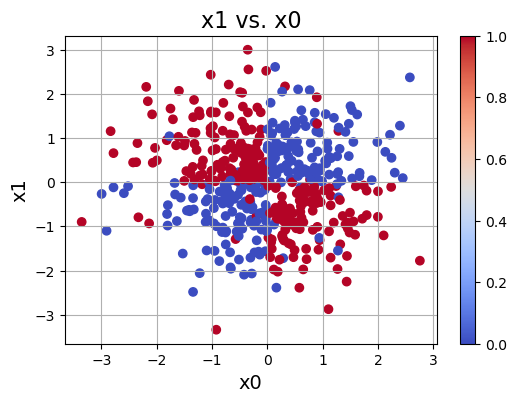

In [5]:
plt.figure(figsize=(6, 4))
plt.scatter(train['x0'], train['x1'], c=train['y'], cmap='coolwarm')
plt.grid(True)
plt.xlabel('x0', fontsize=14)
plt.ylabel('x1', fontsize=14)
plt.title('x1 vs. x0', fontsize=16)
plt.colorbar()


In [14]:
import os
os.environ['PYTHONHASHSEED']=str(2)
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.optimizers.schedules import CosineDecay
from tensorflow.config.experimental import enable_op_determinism
import random
enable_op_determinism()
tf.random.set_seed(2)
np.random.seed(2)
random.seed(2)

# Without cosine decay

In [27]:
model = Sequential()
model.add(Dense(10, activation='relu'))
model.add(Dense(20, activation='relu'))
model.add(Dense(20, activation='relu'))
model.add(Dense(1, activation='sigmoid'))


In [28]:
model.compile(optimizer='Adam', loss='binary_crossentropy', metrics=['accuracy'])
model.fit(X_train, y_train,epochs=100, verbose=0, validation_data=(X_val, y_val))

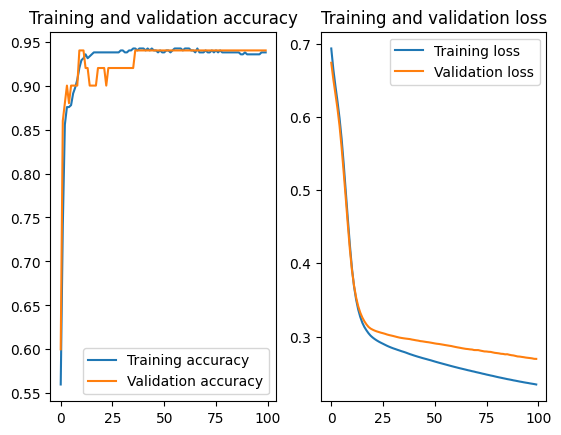

In [29]:
train_acc = model.history.history['accuracy']
val_acc = model.history.history['val_accuracy']
train_loss = model.history.history['loss']
val_loss = model.history.history['val_loss']

plt.subplot(1, 2, 1)
plt.plot(range(100), train_acc, label='Training accuracy')
plt.plot(range(100), val_acc, label='Validation accuracy')
plt.legend()
plt.title("Training and validation accuracy")

plt.subplot(1, 2, 2)
plt.plot(range(100), train_loss, label='Training loss')
plt.plot(range(100), val_loss, label='Validation loss')
plt.legend()
plt.title("Training and validation loss")
plt.show()

In [30]:
results = model.evaluate(X_test, y_test)
print("Accuracy without cosine decay: ", results[1])

16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9040 - loss: 0.3329
Accuracy without cosine decay:  0.9100000262260437


# With Cosine decay

In [34]:
model = Sequential()
model.add(Dense(10, activation='relu'))
model.add(Dense(20, activation='relu'))
model.add(Dense(20, activation='relu'))
model.add(Dense(1, activation='sigmoid')) # Output layer needs to have an activation function that reflects the problem you want to solve. For binary classification you can use sigmoid

cosine_decay_scheduler = CosineDecay(0.001, 1000, warmup_target=0.1, warmup_steps=1000)
optimizer = Adam(learning_rate=cosine_decay_scheduler)


In [35]:
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])
model.fit(X_train, y_train, epochs=100, verbose=0, validation_data=(X_val, y_val))

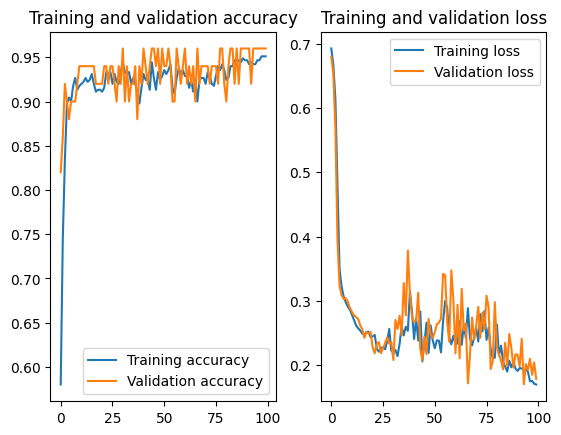

In [36]:
train_acc = model.history.history['accuracy']
val_acc = model.history.history['val_accuracy']
train_loss = model.history.history['loss']
val_loss = model.history.history['val_loss']

plt.subplot(1, 2, 1)
plt.plot(range(100), train_acc, label='Training accuracy')
plt.plot(range(100), val_acc, label='Validation accuracy')
plt.legend()
plt.title("Training and validation accuracy")

plt.subplot(1, 2, 2)
plt.plot(range(100), train_loss, label='Training loss')
plt.plot(range(100), val_loss, label='Validation loss')
plt.legend()
plt.title("Training and validation loss")
plt.show()

More noisy curves, probably reflects the cosine scheduler

In [37]:
results = model.evaluate(X_test, y_test)
print("Accuracy with cosine decay: ", results[1])

16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 915us/step - accuracy: 0.9086 - loss: 0.3184
Accuracy with cosine decay:  0.9200000166893005


The scheduler improves the accuracy and we reach the desired accuracy, but there is still room for improvement in tuning the scheduler.

In [54]:
model = Sequential()
model.add(Dense(10, activation='relu'))
model.add(Dense(20, activation='relu'))
model.add(Dense(20, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

cosine_decay_scheduler = CosineDecay(0.0001, 1000, warmup_target=0.1, warmup_steps=100)
optimizer = Adam(learning_rate=cosine_decay_scheduler)

In [55]:
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])
model.fit(X_train, y_train, epochs=100, verbose=0, validation_data=(X_val, y_val))

In [56]:
results = model.evaluate(X_test, y_test)
print("Accuracy with cosine decay and changing initial learning rate: ", results[1])

16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9184 - loss: 0.2979
Accuracy with cosine decay and changing initial learning rate:  0.9300000071525574


A small improvement, although for some reason the accuracy changed with each run... What about adding more layers?

In [57]:
model = Sequential()
model.add(Dense(10, activation='relu'))
model.add(Dense(20, activation='relu'))
model.add(Dense(20, activation='relu'))
model.add(Dense(20, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

cosine_decay_scheduler = CosineDecay(0.0001, 1000, warmup_target=0.1, warmup_steps=1000)
optimizer = Adam(learning_rate=cosine_decay_scheduler)

In [58]:
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])
model.fit(X_train, y_train, epochs=100, verbose=0, validation_data=(X_val, y_val))

In [59]:
results = model.evaluate(X_test, y_test)
print("Accuracy with cosine decay and more layers: ", results[1])

16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8797 - loss: 0.3632
Accuracy with cosine decay and more layers:  0.8939999938011169


More layers is not always better as the function can overfit if regularization is not added. 

In [62]:
model = Sequential()
model.add(Dense(10, activation='relu', kernel_regularizer="l2"))
model.add(Dense(20, activation='relu', kernel_regularizer="l2"))
model.add(Dense(20, activation='relu', kernel_regularizer="l2"))
model.add(Dense(20, activation='relu', kernel_regularizer="l2"))
model.add(Dense(10, activation='relu', kernel_regularizer="l2"))
model.add(Dense(1, activation='sigmoid'))

cosine_decay_scheduler = CosineDecay(0.0001, 1000, warmup_target=0.1, warmup_steps=100)
optimizer = Adam(learning_rate=cosine_decay_scheduler)

In [63]:
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])
model.fit(X_train, y_train, epochs=100, verbose=0, validation_data=(X_val, y_val))

In [64]:
results = model.evaluate(X_test, y_test)
print("Accuracy with cosine decay and regularization: ", results[1])

16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9083 - loss: 0.4233
Accuracy with cosine decay and regularization:  0.9160000085830688


Not much improvement, perhaps just remove some layers again and reduce warmup target.

In [71]:
model = Sequential()
model.add(Dense(10, activation='relu', kernel_regularizer="l2"))
model.add(Dense(20, activation='relu', kernel_regularizer="l2"))
model.add(Dense(20, activation='relu', kernel_regularizer="l2"))
model.add(Dense(1, activation='sigmoid'))

cosine_decay_scheduler = CosineDecay(0.001, 1000, warmup_target=0.1, warmup_steps=100)
optimizer = Adam(learning_rate=cosine_decay_scheduler)

model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])
model.fit(X_train, y_train, epochs=100, verbose=0, validation_data=(X_val, y_val))

In [72]:
results = model.evaluate(X_test, y_test)
print("Accuracy with cosine decay, regularization and changing warmup target: ", results[1])

16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9081 - loss: 0.4011  
Accuracy with cosine decay, regularization and changing warmup target:  0.9160000085830688


Gives a very minor increase in accuracy and we have reached our target!

# 3.a. Reproducibility
We ensure reproducibility through setting a random seed to all initializers, as seen on top, for both "pythonhasseed", numpy random seed and tf random seed. However, this still is somehow not enough to give the same answer everytime with the same hyperparameters...

# 3.b. Plotting architecture and decision boundary

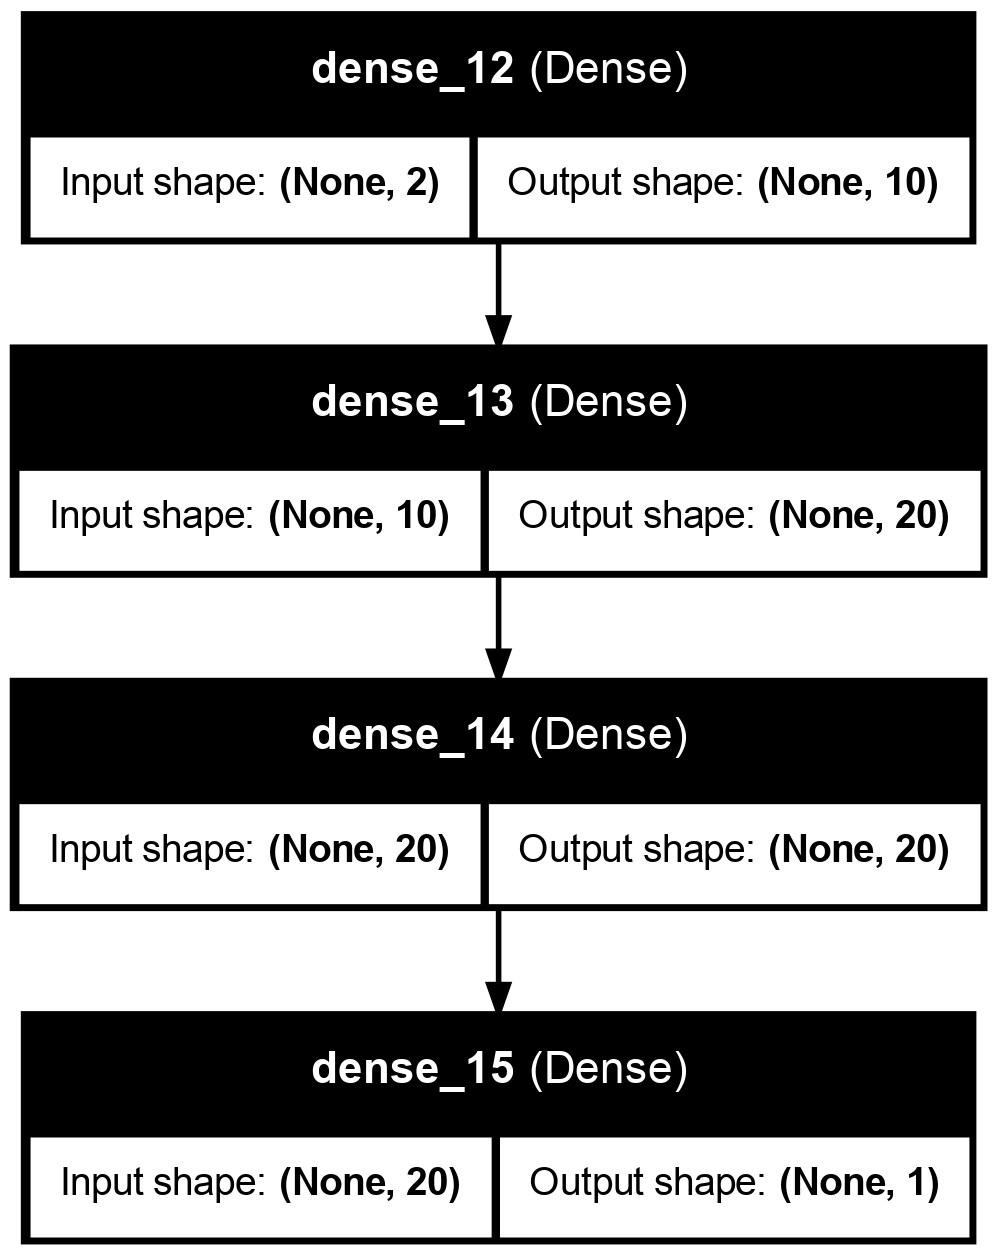

In [20]:
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

The model just shows the input and output shapes and type of layer used.

9600/9600 ━━━━━━━━━━━━━━━━━━━━ 7s 751us/step


<Axes: >

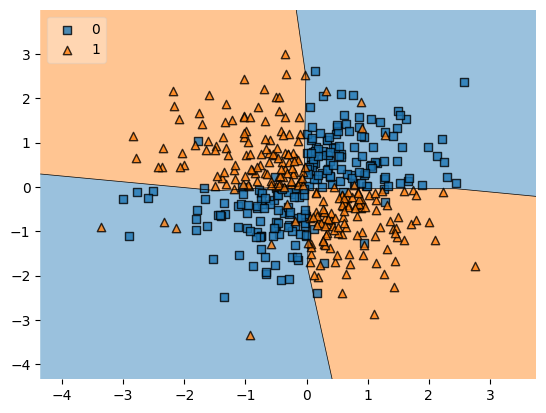

In [74]:
from mlxtend.plotting import plot_decision_regions
y_train = y_train.astype(np.int_)
plot_decision_regions(X=X_train.to_numpy(), y=y_train.to_numpy().reshape(-1), clf=model, legend=2)

We see that the neural network has an accurate decision boundary.

# 3.c. Difference between SGD and Adam optimizers
In their base form they both use a batch gradient descent, only using samples of the dataset to calculate the gradient. Adam adds two additional methods, an adaptive learning rate and a weighted average momentum. The adaptive learning rate is a continous adjustment
of learning rate when training, making it faster to train in most cases. The momentum adds an additional term for the gradient from the last epoch. Essentially, if the training is optimizing well, the momentum would add a velocity to make it continue in the same direction more strongly.
Adam is usually faster to converge, but it has been found that SGD generalize better than adaptive methods. It has also been found that Adam performs better with a manual scheduler. https://arxiv.org/pdf/1712.07628

# 3.d. Visualise learning rate dynamics. Did having a manual scheduler work better?


In [76]:
model = Sequential()
model.add(Dense(10, activation='relu'))
model.add(Dense(20, activation='relu'))
model.add(Dense(20, activation='relu'))
model.add(Dense(1, activation='sigmoid')) # Output layer needs to have an activation function that reflects the problem you want to solve. For binary classification you can use sigmoid

cosine_decay_scheduler = CosineDecay(0.0001, 1000, warmup_target=0.01, warmup_steps=1000)
optimizer = Adam(learning_rate=cosine_decay_scheduler)

model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])
history_manual_scheduler = model.fit(X_train, y_train, epochs=100, verbose=0, validation_data=(X_val, y_val))


In [77]:
results = model.evaluate(X_test, y_test)
print("Accuracy with cosine decay and changing warmup target: ", results[1])
print("Accuracy without cosine decay: ", 0.9120000004768372)

16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 835us/step - accuracy: 0.8957 - loss: 0.3159
Accuracy with cosine decay and changing warmup target:  0.9139999747276306
Accuracy without cosine decay:  0.9120000004768372


Cosine decay improved slightly, with the given hyperparameters.

In [80]:
model = Sequential()
model.add(Dense(10, activation='relu'))
model.add(Dense(20, activation='relu'))
model.add(Dense(20, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer="adam", loss='binary_crossentropy', metrics=['accuracy'])
history_adam = model.fit(X_train, y_train, epochs=100, verbose=0)

In [78]:
model = Sequential()
model.add(Dense(10, activation='relu'))
model.add(Dense(20, activation='relu'))
model.add(Dense(20, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

cosine_decay_scheduler = CosineDecay(0.001, 1000, warmup_target=0.1, warmup_steps=1000)
optimizer = Adam(learning_rate=cosine_decay_scheduler)

model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])
history_high_warmup = model.fit(X_train, y_train, epochs=100, verbose=0, validation_data=(X_val, y_val))

It can be observed that having a manual scheduler can work better, but it does require additional tuning to initial learning rate, decay steps, warmup and warmup steps. 

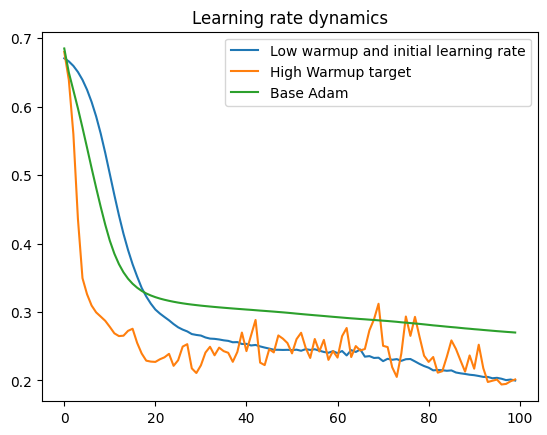

In [81]:
loss_manual = history_manual_scheduler.history['loss']
loss_high_warmup = history_high_warmup.history['loss']
loss_adam = history_adam.history['loss']
epochs = range(100)
plt.plot(epochs, loss_manual, label='Low warmup and initial learning rate')
plt.plot(epochs, loss_high_warmup, label='High Warmup target')
plt.plot(epochs, loss_adam, label='Base Adam')
plt.title('Learning rate dynamics')
plt.legend()
plt.show()

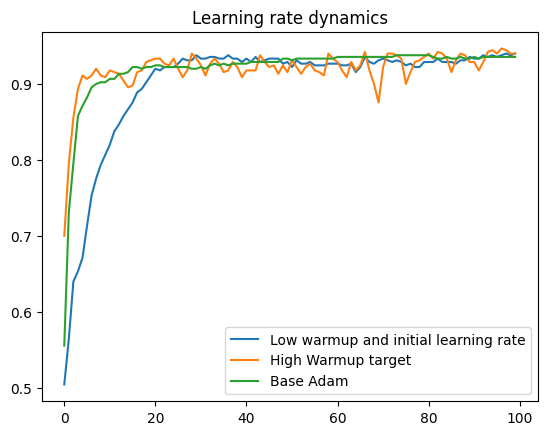

In [82]:
acc_manual = history_manual_scheduler.history['accuracy']
acc_high_warmup = history_high_warmup.history['accuracy']
acc_adam = history_adam.history['accuracy']
epochs = range(100)
plt.plot(epochs, acc_manual, label='Low warmup and initial learning rate')
plt.plot(epochs, acc_high_warmup, label='High Warmup target')
plt.plot(epochs, acc_adam, label='Base Adam')
plt.title('Learning rate dynamics')
plt.legend()
plt.show()

From The plot we can see the learning rate dynamics and that having a tuned manual scheduler gives the best performance. Having a manual scheduler does give better loss in general, but not necessarily a massively improved metric in this case.

# 3.e. Ablation study
We have already tested and seen that having a manual scheduler helps performance. What about changing the optimizer on default scheduler?

In [83]:
model = Sequential()
model.add(Dense(10, activation='relu'))
model.add(Dense(20, activation='relu'))
model.add(Dense(20, activation='relu'))
model.add(Dense(1, activation='sigmoid')) # Output layer needs to have an activation function that reflects the problem you want to solve. For binary classification you can use sigmoid


model.compile(optimizer="SGD", loss='binary_crossentropy', metrics=['accuracy'])
model.fit(X_train, y_train, epochs=100, verbose=0, validation_data=(X_val, y_val))
results = model.evaluate(X_test, y_test)
print("Accuracy with SGD: ", results[1])

16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8358 - loss: 0.4499
Accuracy with SGD:  0.8560000061988831


SGD performs worse than adam, having an adaptive learning rate can improve performance. However, SGD can be variable as it depends on the batch it chooses. Let's try two more, RMSProp and AdamW.

In [85]:
model = Sequential()
model.add(Dense(10, activation='relu'))
model.add(Dense(20, activation='relu'))
model.add(Dense(20, activation='relu'))
model.add(Dense(1, activation='sigmoid')) # Output layer needs to have an activation function that reflects the problem you want to solve. For binary classification you can use sigmoid


model.compile(optimizer="rmsprop", loss='binary_crossentropy', metrics=['accuracy'])
model.fit(X_train, y_train, epochs=100, verbose=0, validation_data=(X_val, y_val))
results = model.evaluate(X_test, y_test)
print("Accuracy with rmsprop: ", results[1])

16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9008 - loss: 0.3528
Accuracy with rmsprop:  0.9160000085830688


In [86]:
model = Sequential()
model.add(Dense(10, activation='relu'))
model.add(Dense(20, activation='relu'))
model.add(Dense(20, activation='relu'))
model.add(Dense(1, activation='sigmoid')) # Output layer needs to have an activation function that reflects the problem you want to solve. For binary classification you can use sigmoid


model.compile(optimizer="adamw", loss='binary_crossentropy', metrics=['accuracy'])
model.fit(X_train, y_train, epochs=100, verbose=0, validation_data=(X_val, y_val))
results = model.evaluate(X_test, y_test)
print("Accuracy with rmsprop: ", results[1])

16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 1000us/step - accuracy: 0.8844 - loss: 0.3436
Accuracy with rmsprop:  0.8999999761581421


Of these, SGD performed the worst in accuracy. What about changing the activation function?

In [88]:
model = Sequential()
model.add(Dense(10, activation='tanh'))
model.add(Dense(20, activation='tanh'))
model.add(Dense(20, activation='tanh'))
model.add(Dense(1, activation='sigmoid')) # Output layer needs to have an activation function that reflects the problem you want to solve. For binary classification you can use sigmoid


model.compile(optimizer="adam", loss='binary_crossentropy', metrics=['accuracy'])
model.fit(X_train, y_train, epochs=100, verbose=0, validation_data=(X_val, y_val))
results = model.evaluate(X_test, y_test)
print("Accuracy with rmsprop: ", results[1])

16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9018 - loss: 0.3476
Accuracy with rmsprop:  0.9120000004768372


Tanh function does not perform that well compared to ReLU. What about only using sigmoids?

In [90]:
model = Sequential()
model.add(Dense(10, activation='sigmoid'))
model.add(Dense(20, activation='sigmoid'))
model.add(Dense(20, activation='sigmoid'))
model.add(Dense(1, activation='sigmoid')) # Output layer needs to have an activation function that reflects the problem you want to solve. For binary classification you can use sigmoid


model.compile(optimizer="adam", loss='binary_crossentropy', metrics=['accuracy'])
model.fit(X_train, y_train, epochs=100, verbose=0, validation_data=(X_val, y_val))
results = model.evaluate(X_test, y_test)
print("Accuracy with rmsprop: ", results[1])

16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 845us/step - accuracy: 0.5163 - loss: 0.6905
Accuracy with rmsprop:  0.5299999713897705


Only having sigmoid does not work well, even though tanh and sigmoid have the same function shape, tanh is centered at the origin rather than 0.5, making it more symmetric.

# 📶📡🛰️🤳 Mission 2.2: Locate the AI Servers

### 🌐 The Discovery
The NTNU Intelligence team has intercepted encrypted documentation that potentially reveals the locations of AI-compromised servers within Trondheim. Our analysts believe the data contains information about these servers' locations. 

However, the number of servers and their exact positions remain unknown. To execute a strategic response, we need to understand the intercepted data and pinpoint the main AI servers.

We have also discovered a vulnerability in the AI's security: it has deployed a clustering verification feature on Kaggle. We can exploit this backdoor to validate our clustering hypotheses.

### 🎯 Your Mission
Identify the number of hidden servers (clusters) in the dataset. Assign cluster labels to each row in the original dataset and validate your clustering solution on Kaggle.  When achieved the perfect clustering accuracy, find the precise locations of these servers (clusters).

### 🧠 The Challenge
1. **Large Dataset**: The intercepted data file contains numerous features, making direct manipulation and clustering difficult. Applying dimensionality reduction techniques could help reveal patterns.
2. **Unsupervised Learning**: No target labels are provided, so you must identify patterns based solely on the dataset's features.
3. **Data Obfuscation**: The AI has obfuscated the data, making it difficult to discern its true structure. You must effectively manipulate the data to visually identify server locations.


### 🚀 Your Tools
- The intercepted AI dataset.
- Skills in feature engineering, data manipulation, and visualization.
- Clustering algorithms (e.g., KMeans, DBSCAN, Birch, Agglomerative Clustering, etc.) — [Clustering in Scikit-Learn](https://scikit-learn.org/stable/modules/clustering.html)
- Dimensionality reduction techniques (e.g., PCA, t-SNE, Isomap, UMAP, etc.)
- Kaggle competition platform with a daily submission limit of 50 attempts (~30 days * 50 submissions = 1500 total attempts per student).

> Note: Kaggle competition link — [Kaggle Competition](https://www.kaggle.com/t/6610d6c6ba314eac9ead0b7a47695700)

### 📊 Formal Requirements
1. **Achieve 100% Clustering Accuracy** on Kaggle.
> Note: The only way to check whether your clustering is correct is to submit it to Kaggle. We do not give you the clusters directly.

2. **Discussion Questions**:
   - **Dimensionality Reduction**: Which dimensionality reduction methods helped you determine the correct number of clusters? Why did some methods work better than others? Explain the differences between PCA, t-SNE, and UMAP.
   - **Clustering Approach**: Which clustering algorithm and hyperparameters did you use? Discuss the differences between algorithms like KMeans and DBSCAN.
   - **Server Locations**: Identify the server locations. List the specific facilities in Trondheim and explain how you deduced their locations.
   - **Data Type Analysis**: What is the hidden data type in the dataset? How does this information influence feature extraction for clustering? Can it explain why some dimensionality reduction algorithms are more effective?
   - **Advanced Task (Optional)**: Extract features using modern pre-trained neural networks for this data type. Apply dimensionality reduction and clustering algorithms to the extracted features.


In [91]:
%reset -f

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

2024-10-16 13:45:28.830677: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-10-16 13:45:28.849623: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-10-16 13:45:28.856708: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-10-16 13:45:28.870623: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-10-16 13:45:29.981647: W tensorflow/compiler/tf2

Deciphering and sorting columns

In [10]:
data = pd.read_csv('unsupervised_data.csv', skiprows=1, header=None)
# Get the ID column
hidden_ = pd.read_csv('unsupervised_data.csv', nrows=1)
hidden_dtype = hidden_.columns.to_numpy()
testing = [col.rsplit('col_')[1] for col in hidden_dtype]
testing = [int(i) for i in testing]
data.columns = testing
data = data.reindex(sorted(data.columns), axis=1)
data.reset_index(drop=False, inplace=True)
data.rename(columns={'index': 'ID'}, inplace=True)

In [134]:
# The dataset is heavy. Applying clustering directly on the dataset is not feasible, I guess. 
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Columns: 16385 entries, ID to 16383
dtypes: float64(16384), int64(1)
memory usage: 500.0 MB


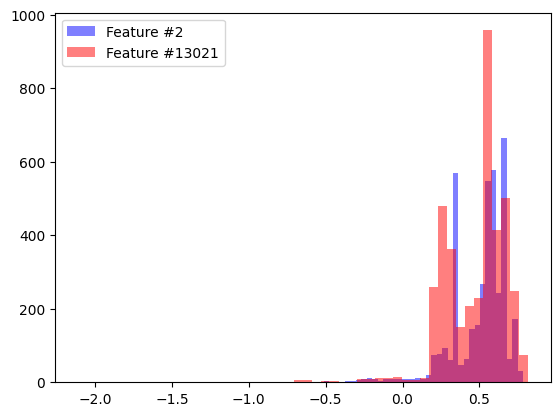

In [36]:
plt.hist(data.iloc[:, 2], bins=50, color='blue', alpha=0.5, label='Feature #2')
plt.hist(data.iloc[:, 13021], bins=50, color='red', alpha=0.5, label='Feature #13021')
plt.legend()

In [75]:
# To check your clustering, you need to assign the predicted cluster ids and submit it as a CSV file. The submission should be a CSV file with two columns: ID and cluster. 
# The ID column should contain the ID of the data point, and the cluster column should contain the cluster ID that the data point belongs to. 
# The cluster ID should be an integer. Current cluster IDs in sample_submission.csv are randomly generated.
sample_submission = pd.read_csv('sample_submission.csv')
sample_submission

,ID,cluster
0,0,2
1,1,6
2,2,3
3,3,3
4,4,8
...,...,...
3995,3995,3
3996,3996,7
3997,3997,3
3998,3998,7


In [15]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.cluster import DBSCAN
import umap

# This section is deciphering with reordered columns

In [88]:
umap_deciphered = umap.UMAP(n_neighbors=30, random_state=10)
umap_results = umap_deciphered.fit_transform(data.iloc[:, 1:])

/home/michael/miniconda3/envs/tdt4172/lib/python3.11/site-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


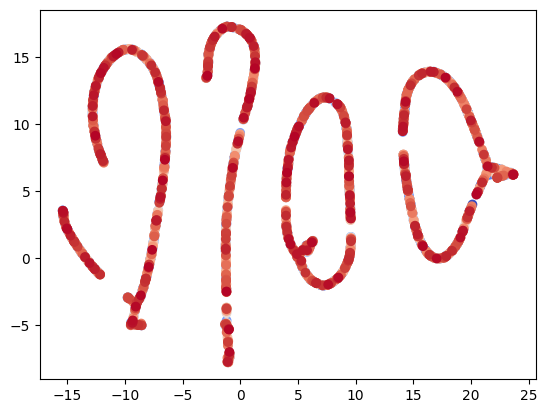

In [89]:
plt.scatter(umap_results[:, 0], umap_results[:, 1], c=data.iloc[:, 0], cmap='coolwarm')
plt.show()

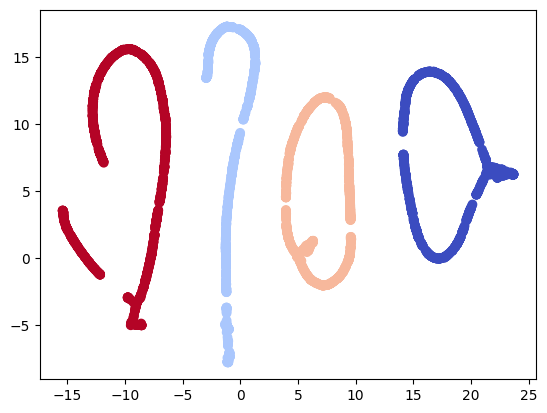

In [90]:
dbscan_model = DBSCAN(eps=3, min_samples=10)
dbscan_results_deciphered = dbscan_model.fit_predict(umap_results)
plt.scatter(umap_results[:, 0], umap_results[:, 1], c=dbscan_results_deciphered, cmap='coolwarm')
plt.show()

In [59]:
dbscan_results_deciphered_df = pd.DataFrame(dbscan_results_deciphered.T) 
dbscan_results_deciphered_df.reset_index(drop=False, inplace=True)
dbscan_results_deciphered_df.rename(columns={'index': 'ID'}, inplace=True)
dbscan_results_deciphered_df.rename(columns={0: 'cluster'}, inplace=True)
dbscan_results_deciphered_df.to_csv('dbscan_results_deciphered.csv', index=False)

I have managed to identify 4 clusters by using Kaggle and we can just plot and find 4 unique locations in the data!

## Server locations

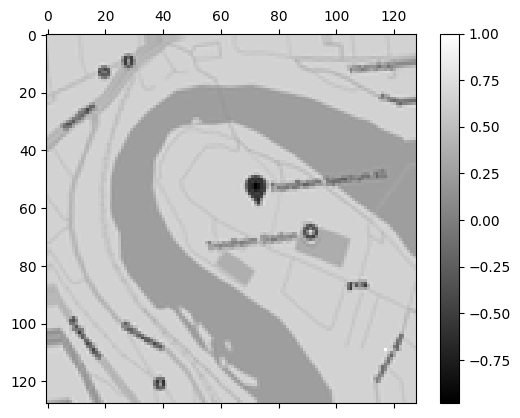

In [52]:
plt.matshow(data.iloc[3000, 1:].to_numpy().reshape(128, 128), fignum=0, cmap='gray')
plt.colorbar()
plt.show()

Location of cluster 1 is at Trondheim Spektrum!

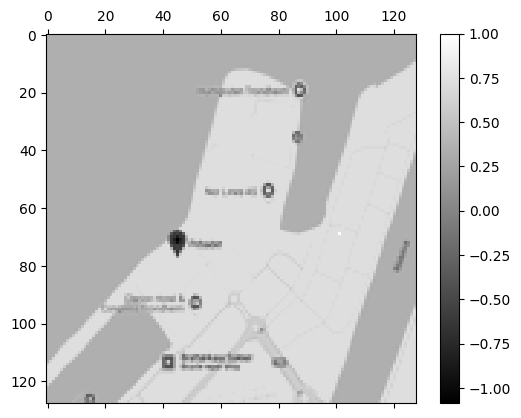

In [29]:
plt.matshow(data.iloc[500, 1:].to_numpy().reshape(128, 128), fignum=0, cmap='gray')
plt.colorbar()
plt.show()

Location of cluster 2 is at Pirbadet!

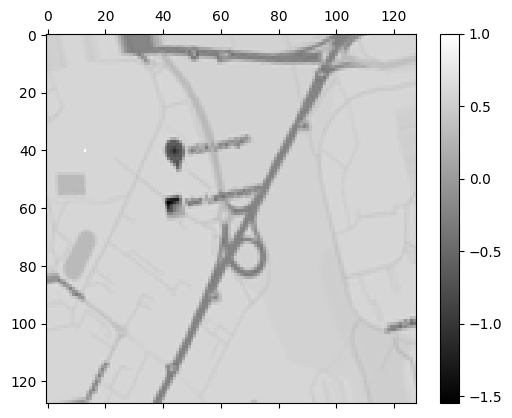

In [41]:
plt.matshow(data.iloc[530, 1:].to_numpy().reshape(128, 128), fignum=0, cmap='gray')
plt.colorbar()
plt.show()

Location of cluster 3 is at IKEA Leangen!

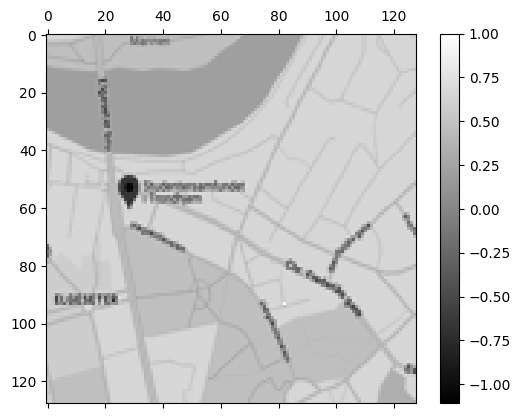

In [42]:
plt.matshow(data.iloc[555, 1:].to_numpy().reshape(128, 128), fignum=0, cmap='gray')
plt.colorbar()
plt.show()

Location of cluster 4 is at Studendersamfundet!

# Without deciphering switch to unordered columns for the dataset here!!!!
This part was done before I reordered the columns, and I actually managed to get 100% performance this way, but it was impossible to find the locations since the 128x128 images were scrambled. 

In [ ]:
#Switch to unordered columns
data = pd.read_csv('unsupervised_data.csv', skiprows=1, header=None)
# Get the ID column
data.reset_index(drop=False, inplace=True)
data.rename(columns={'index': 'ID'}, inplace=True)

# PCA

In [14]:
pca_80 = PCA(.8)
pca_80.fit(data.iloc[:, 1:])

PCA(n_components=0.8)

In [15]:
pca_90 = PCA(.9)
pca_90.fit(data.iloc[:, 1:])

PCA(n_components=0.9)

In [16]:
pca_results_80 = pca_80.transform(data.iloc[:, 1:])
pca_results_90 = pca_90.transform(data.iloc[:, 1:])

PCA is a linear operation used to make orthogonal vectors from the data that best explains the variance. We want to contain most of the variance in as few principal components as possible. By doing this PCA can be used to filter out noise in features that have little importance and to
be able to use in further analysis. By having fewer features, other dimension reduction methods (usually nonlinear such as TSNE) can be run faster. We run for both 80% and 90% variance explained for experimentation.

# TSNE

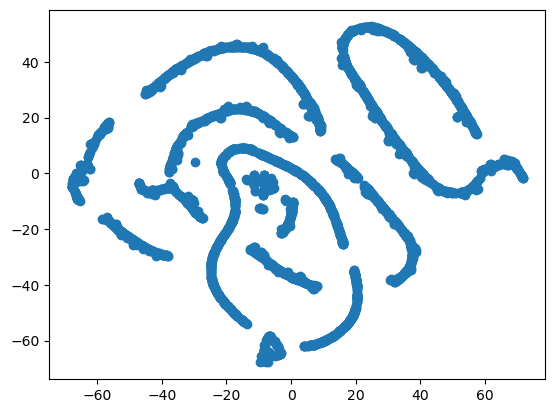

In [114]:
pca_results_80 = pca_80.transform(data.iloc[:, 1:])
tsne_80 = TSNE(n_components=2, perplexity=40, random_state=42, n_jobs=-1)
tsne_results_80 = tsne_80.fit_transform(pca_results_80)
plt.scatter(tsne_results_80[:, 0], tsne_results_80[:, 1])
plt.show()

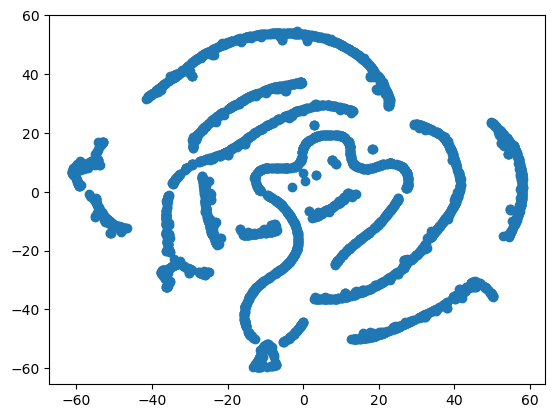

In [117]:
pca_results_90 = pca_90.transform(data.iloc[:, 1:])
tsne_90 = TSNE(n_components=2, perplexity=50, random_state=42, n_jobs=-1)
tsne_results_90 = tsne_90.fit_transform(pca_results_90)
plt.scatter(tsne_results_90[:, 0], tsne_results_90[:, 1])
plt.show()

There is noticeable difference, but TSNE is only used for visualisation. CLustering with TSNE is problematic because what you get out might be artifacts of the algorithm and is heavily dependent on the perplexity hyperparameter and it does not generally model global structure well.

## TSNE with re-ordering

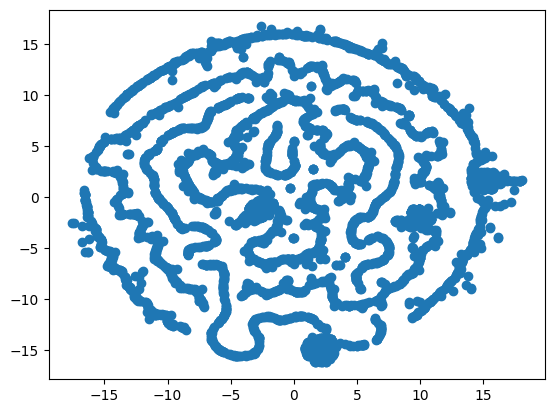

In [100]:
t_sne = TSNE(n_components=2, perplexity=1000, random_state=42, n_jobs=-1)
tsne_results =t_sne.fit_transform(data.iloc[:, 1:])

plt.scatter(tsne_results[:, 0], tsne_results[:, 1])
plt.show()

# UMAP and Clustering (DBSCAN)

In [4]:
umap_reduction = umap.UMAP(random_state=42)
umap_results = umap_reduction.fit_transform(data.iloc[:, 1:])

/home/michael/miniconda3/envs/tdt4172/lib/python3.12/site-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


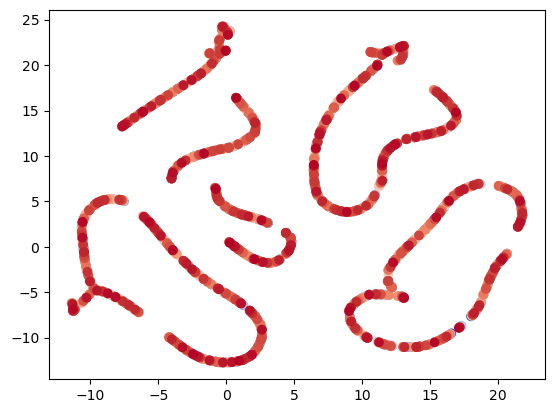

In [81]:
plt.scatter(umap_results[:, 0], umap_results[:, 1], c=data.iloc[:, 0], cmap='coolwarm')
plt.show()

In [125]:
dbscan_model = DBSCAN(eps=1, min_samples=10)
dbscan_results_umap_eps_1 = dbscan_model.fit_predict(umap_results)

In [126]:
dbscan_results_umap_eps_1_df = pd.DataFrame(dbscan_results_umap_eps_1.T) 
dbscan_results_umap_eps_1_df.reset_index(drop=False, inplace=True)
dbscan_results_umap_eps_1_df.rename(columns={'index': 'ID'}, inplace=True)
dbscan_results_umap_eps_1_df.rename(columns={0: 'cluster'}, inplace=True)
dbscan_results_umap_eps_1_df.to_csv('dbscan_results_umap.csv', index=False)

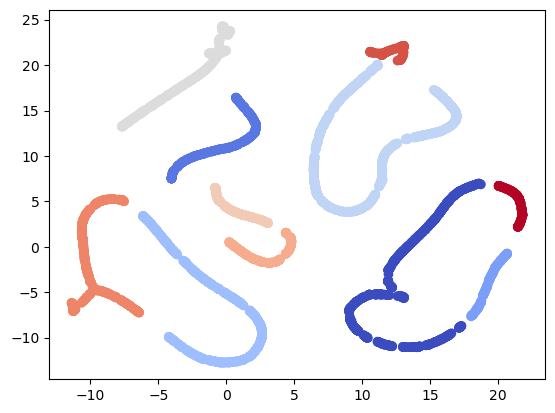

In [83]:
plt.scatter(umap_results[:, 0], umap_results[:, 1], c=dbscan_results_umap_eps_1, cmap='coolwarm')
plt.show()

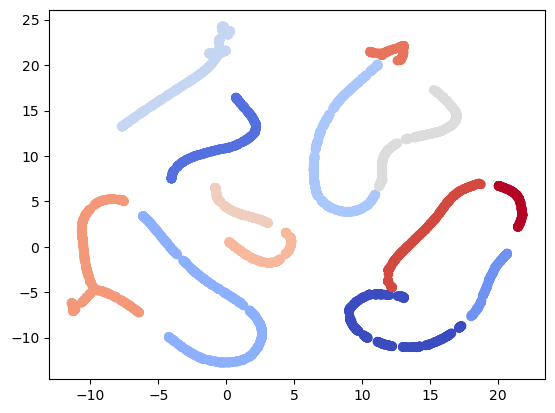

In [104]:
dbscan_model = DBSCAN(eps=0.85, min_samples=10)
dbscan_results_umap = dbscan_model.fit_predict(umap_results)
plt.scatter(umap_results[:, 0], umap_results[:, 1], c=dbscan_results_umap, cmap='coolwarm')
plt.show()

In [121]:
dbscan_results_umap_df = pd.DataFrame(dbscan_results_umap.T) 
dbscan_results_umap_df.reset_index(drop=False, inplace=True)
dbscan_results_umap_df.rename(columns={'index': 'ID'}, inplace=True)
dbscan_results_umap_df.rename(columns={0: 'cluster'}, inplace=True)
dbscan_results_umap_df.to_csv('dbscan_results_umap.csv', index=False)

In [ ]:
dbscan_model = DBSCAN(eps=0.7, min_samples=5)
dbscan_results_umap = dbscan_model.fit_predict(umap_results)
plt.scatter(umap_results[:, 0], umap_results[:, 1], c=dbscan_results_umap, cmap='coolwarm')
plt.show()

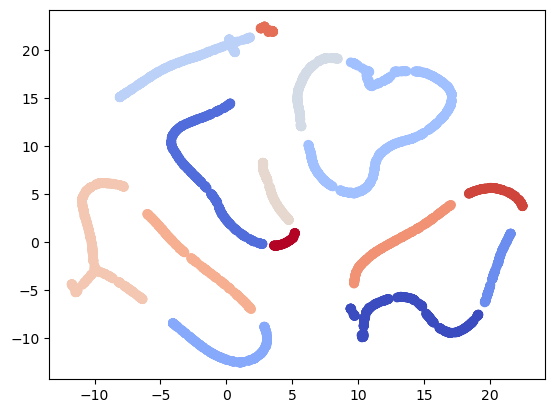

In [11]:
dbscan_model_new = DBSCAN(eps=0.8, min_samples=10)
dbscan_results_umap_new = dbscan_model_new.fit_predict(umap_results)
plt.scatter(umap_results[:, 0], umap_results[:, 1], c=dbscan_results_umap_new, cmap='coolwarm')
plt.show()

In [12]:
dbscan_results_umap_df = pd.DataFrame(dbscan_results_umap_new.T) 
dbscan_results_umap_df.reset_index(drop=False, inplace=True)
dbscan_results_umap_df.rename(columns={'index': 'ID'}, inplace=True)
dbscan_results_umap_df.rename(columns={0: 'cluster'}, inplace=True)
dbscan_results_umap_df.to_csv('dbscan_results_umap.csv', index=False)

The procedure above did not give any meaningful insight, and gave low scores on kaggle. Let's try something else

# UMAP with PCA and Clustering (DBSCAN)

/home/michael/miniconda3/envs/tdt4172/lib/python3.12/site-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")
/home/michael/miniconda3/envs/tdt4172/lib/python3.12/site-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


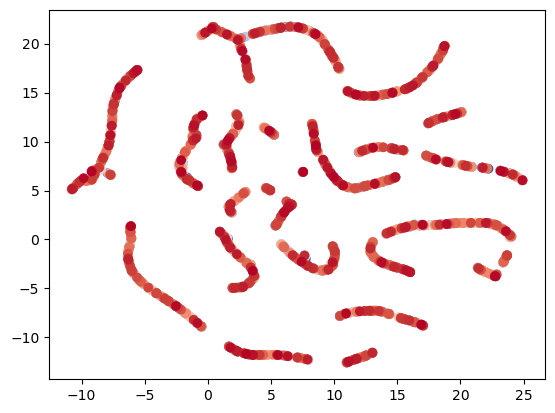

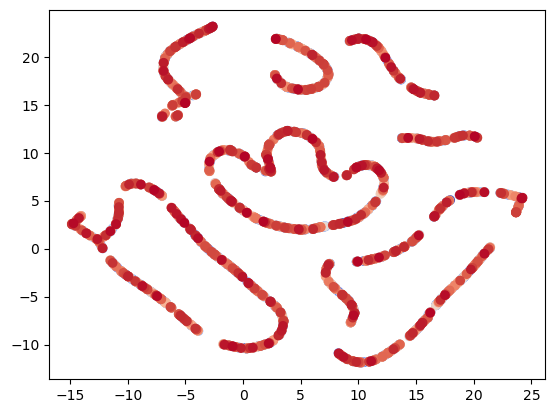

In [18]:
umap_reduction_pca80 = umap.UMAP(random_state=42)
umap_reduction_pca90 = umap.UMAP(random_state=42)
umap_results_pca80 = umap_reduction_pca80.fit_transform(pca_results_80)
umap_results_pca90 = umap_reduction_pca90.fit_transform(pca_results_90)

plt.scatter(umap_results_pca80[:, 0], umap_results_pca80[:, 1], c=data.iloc[:, 0], cmap='coolwarm')
plt.show()

plt.scatter(umap_results_pca90[:, 0], umap_results_pca90[:, 1], c=data.iloc[:, 0], cmap='coolwarm')
plt.show()

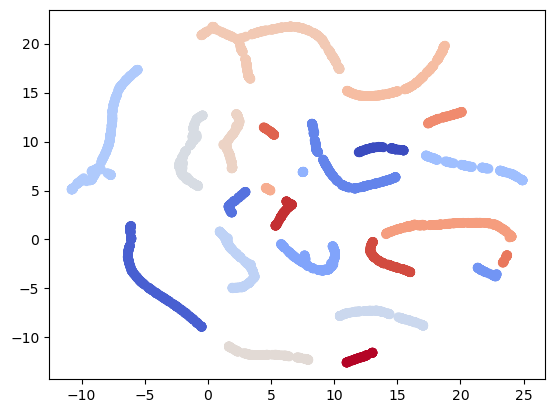

In [31]:
dbscan_model80 = DBSCAN(eps=1, min_samples=5)
dbscan_results_pca80_eps1 = dbscan_model80.fit_predict(umap_results_pca80)
plt.scatter(umap_results_pca80[:, 0], umap_results_pca80[:, 1], c=dbscan_results_pca80_eps1, cmap='coolwarm')
plt.show()

In [24]:
dbscan_results_pca80_eps1_df = pd.DataFrame(dbscan_results_pca80_eps1.T) 
dbscan_results_pca80_eps1_df.reset_index(drop=False, inplace=True)
dbscan_results_pca80_eps1_df.rename(columns={'index': 'ID'}, inplace=True)
dbscan_results_pca80_eps1_df.rename(columns={0: 'cluster'}, inplace=True)
dbscan_results_pca80_eps1_df.to_csv('dbscan_results_pca80_eps1.csv', index=False)

With eps=1 and min_samples= 10 with pca80 we get a low score of 0.32525. Too much info is probably discarded by only having 80% variance explained.

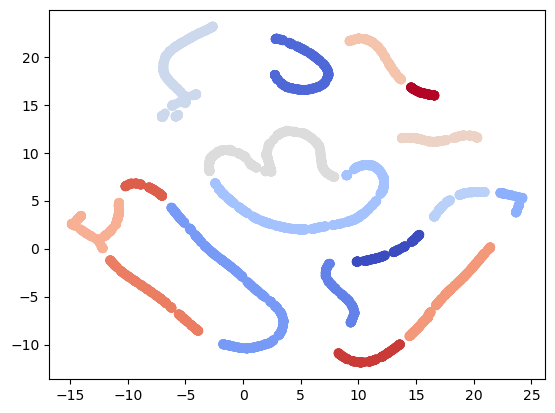

In [22]:
dbscan_model90 = DBSCAN(eps=1, min_samples=10)
dbscan_results_pca90_eps1 = dbscan_model90.fit_predict(umap_results_pca90)
plt.scatter(umap_results_pca90[:, 0], umap_results_pca90[:, 1], c=dbscan_results_pca90_eps1, cmap='coolwarm')
plt.show()

In [25]:
dbscan_results_pca90_eps1_df = pd.DataFrame(dbscan_results_pca90_eps1.T) 
dbscan_results_pca90_eps1_df.reset_index(drop=False, inplace=True)
dbscan_results_pca90_eps1_df.rename(columns={'index': 'ID'}, inplace=True)
dbscan_results_pca90_eps1_df.rename(columns={0: 'cluster'}, inplace=True)
dbscan_results_pca90_eps1_df.to_csv('dbscan_results_pca90_eps1.csv', index=False)

We get a score of 0.4015, perhaps pca is still too low? We attempt one last time with 95% variance explained.

In [32]:
pca95 = PCA(0.95)
pca95_results = pca95.fit_transform(data.iloc[:, 1:])

/home/michael/miniconda3/envs/tdt4172/lib/python3.12/site-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


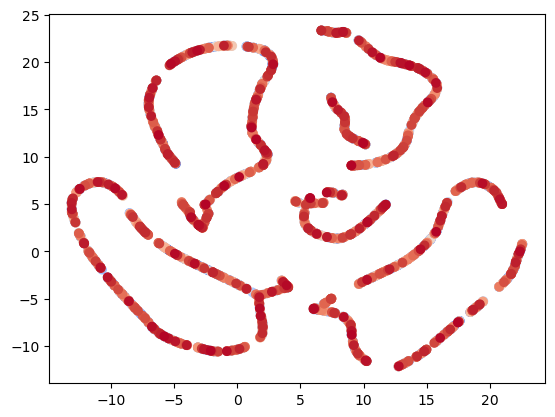

In [33]:
umap_reduction_pca95 = umap.UMAP(random_state=42)
umap_results_pca95 = umap_reduction_pca95.fit_transform(pca95_results)

plt.scatter(umap_results_pca95[:, 0], umap_results_pca95[:, 1], c=data.iloc[:, 0], cmap='coolwarm')
plt.show()

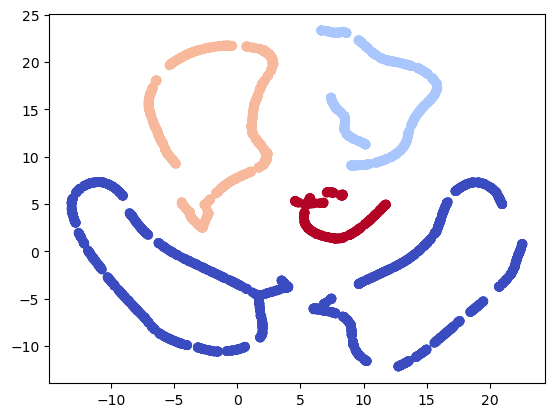

In [46]:
dbscan_model95 = DBSCAN(eps=2.7, min_samples=10)
dbscan_results_pca95_eps1 = dbscan_model95.fit_predict(umap_results_pca95)

plt.scatter(umap_results_pca95[:, 0], umap_results_pca95[:, 1], c=dbscan_results_pca95_eps1, cmap='coolwarm')
plt.show()

In [47]:
dbscan_results_pca95_eps1_df = pd.DataFrame(dbscan_results_pca95_eps1.T) 
dbscan_results_pca95_eps1_df.reset_index(drop=False, inplace=True)
dbscan_results_pca95_eps1_df.rename(columns={'index': 'ID'}, inplace=True)
dbscan_results_pca95_eps1_df.rename(columns={0: 'cluster'}, inplace=True)
dbscan_results_pca95_eps1_df.to_csv('dbscan_results_pca95_eps2.7.csv', index=False)

Tuning the eps from 2 and 2.7 we get a score of 0.72925 and 0.91375 respectively. These are great results, but looking at the plots make it seem like there is little improvement potential in terms of where points can be redistributed. Maybe we missed something in the full dataset? Perhaps we need to go back to the full dataset with no PCA? Perhaps we need to increase eps or n_neighbors in UMAP. It is not easy to tell if PCA actually benefits here, but we experiment by going back to tuning umap and clustering.

# Back to UMAP and clustering

/home/michael/miniconda3/envs/tdt4172/lib/python3.12/site-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


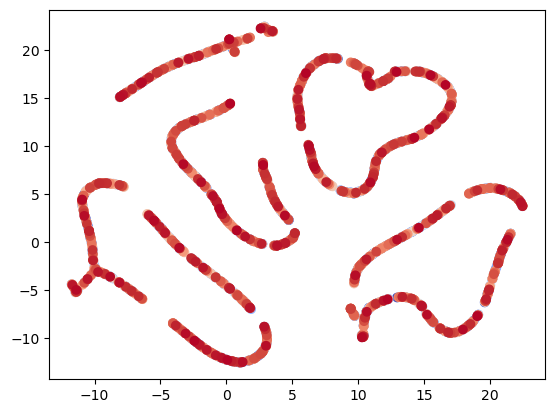

In [48]:
umap_reduction = umap.UMAP(random_state=42)
umap_results = umap_reduction.fit_transform(data.iloc[:, 1:])

plt.scatter(umap_results[:, 0], umap_results[:, 1], c=data.iloc[:, 0], cmap='coolwarm')
plt.show()

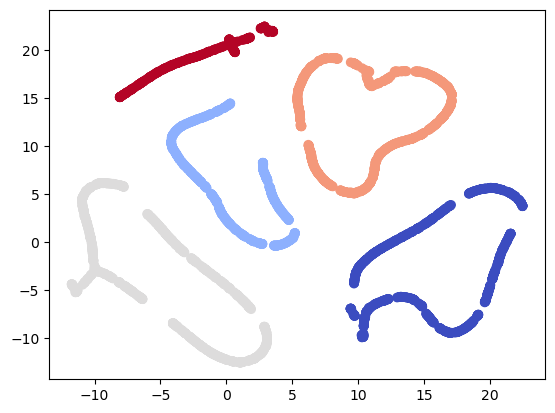

In [53]:
dbscan_model_new = DBSCAN(eps=3.5, min_samples=5)
dbscan_results_umap_new = dbscan_model_new.fit_predict(umap_results)
plt.scatter(umap_results[:, 0], umap_results[:, 1], c=dbscan_results_umap_new, cmap='coolwarm')
plt.show()

In [54]:
dbscan_results_umap_df = pd.DataFrame(dbscan_results_umap_new.T) 
dbscan_results_umap_df.reset_index(drop=False, inplace=True)
dbscan_results_umap_df.rename(columns={'index': 'ID'}, inplace=True)
dbscan_results_umap_df.rename(columns={0: 'cluster'}, inplace=True)
dbscan_results_umap_df.to_csv('dbscan_results_umap_eps3.5.csv', index=False)

We get the same max score as before 0.9135, so PCA didn't really matter, perhaps we need to tune the UMAP hyperparameters.

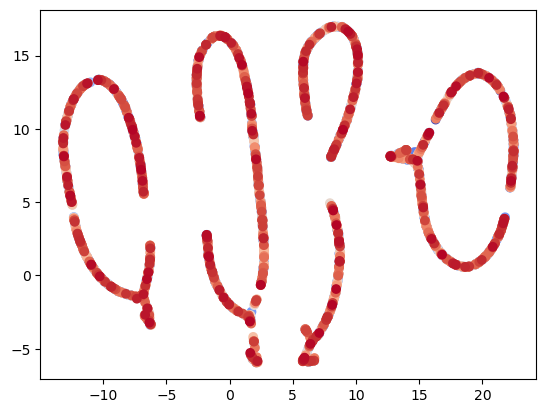

In [58]:
umap_reduction = umap.UMAP(n_neighbors=30)
umap_results = umap_reduction.fit_transform(data.iloc[:, 1:])

plt.scatter(umap_results[:, 0], umap_results[:, 1], c=data.iloc[:, 0], cmap='coolwarm')
plt.show()

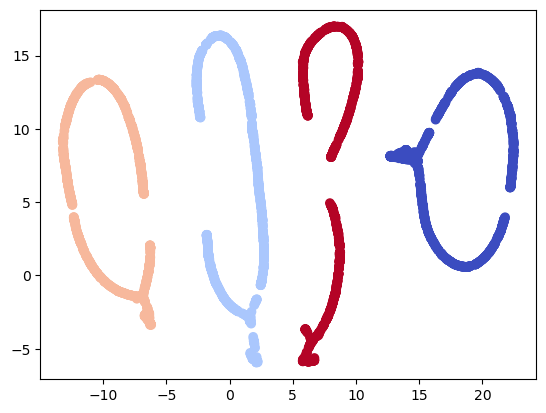

In [67]:
dbscan_model_new = DBSCAN(eps=3.4, min_samples=10)
dbscan_results_umap_new = dbscan_model_new.fit_predict(umap_results)
plt.scatter(umap_results[:, 0], umap_results[:, 1], c=dbscan_results_umap_new, cmap='coolwarm')
plt.show()

In [141]:
dbscan_results_umap_df = pd.DataFrame(dbscan_results_umap_new.T) 
dbscan_results_umap_df.reset_index(drop=False, inplace=True)
dbscan_results_umap_df.rename(columns={'index': 'ID'}, inplace=True)
dbscan_results_umap_df.rename(columns={0: 'cluster'}, inplace=True)
dbscan_results_umap_df.to_csv('dbscan_results_neighbor30_eps3.4.csv', index=False)

This method with accompanied tuning gave us the desired 100% clustering accuracy! It essentially worked with and without deciphering and reordering the columns somehow as both gave 100% accuracy. 

2. **Discussion Questions**:
   - **Dimensionality Reduction**: Which dimensionality reduction methods helped you determine the correct number of clusters? Why did some methods work better than others? Explain the differences between PCA, t-SNE, and UMAP.
   - **Clustering Approach**: Which clustering algorithm and hyperparameters did you use? Discuss the differences between algorithms like KMeans and DBSCAN.
   - **Server Locations**: Identify the server locations. List the specific facilities in Trondheim and explain how you deduced their locations.
   - **Data Type Analysis**: What is the hidden data type in the dataset? How does this information influence feature extraction for clustering? Can it explain why some dimensionality reduction algorithms are more effective?
   - **Advanced Task (Optional)**: Extract features using modern pre-trained neural networks for this data type. Apply dimensionality reduction and clustering algorithms to the extracted features.

## Dimensionality reduction
UMAP was the most helpful in determining the correct number of clusters. PCA is usually used for preprocessing to optimize runtime for t-SNE and UMAP. UMAP seemed to be insensitive when using PCA or not as shown above, it was more sensitive to tuning. t-SNE did not help much, although I did not really try to tune it since it took quite a while to run. UMAP was both fast and informative hence why I stuck with it. PCA is a linear dimension reduction method and tries to condense variance explained, it can work for nonlinear data as long as the variance is somewhat preserved. Since it only tries to condense variance, it is not trying to preserve global/local distances from high to low dimension, it is more of a preprocessing tool than used for visualisation. t-SNE uses a t-distribution to calculate the probability of points being neighbors in both high and low dimension. It is best at calculating local structure, but struggles in global structure and distance between clusters can be arbitrary. In the cases it can preserve global structure the perplexity needs to be high, which increases runtime substantially and it is not guaranteed to yield anything good.

UMAP is similar to t-SNE, and is better at keeping global structure while being good at local structure. It uses simplices a topology term which I have no familiarity with and essentially is a topological method. It is a graph method with nodes and edges and tries to optimize attractive and repulsive forces, which is similar to t-SNE. Perhaps, since each point is essentially an image of 128x128, UMAP is not that sensitive to the order of the features, it can infer topological structure regardless. I have done attempted this with and without reordering and got the exact same result in terms of shape and number of clusters. 

##

## Clustering approach
I used DBSCAN for clustering with hyperparameters eps=2-3.5 depending on if I used the reordered columns or not. Since what UMAP calculates can be different each time, the eps also needs to be tuned accordingly, but the structure is there. The n_neighbors for UMAP was set to 30 and the clusters that came out were quite clear, though only confirmed through Kaggle.
By observing what was calculated by UMAP, using DBSCAN was obvious due to the density and oval shapes of the clusters. K-means only really works for circular clusters and it would have performed poorly. The main difference between the two is that DBSCAN is density based, with how many points are nearby with a given radius to determine core and non-core points, where we expand with core points only. K-means is centroid based and we have to manually choose the number of clusters, which can itself be a challenge. The centroid is iteratively moved to try to fit points to the centroids, with the closest point to a centroid is assigned to that centroid. It uses euclidean distance measures, which is why it is bests for circular clusters. DBSCAN is also euclidean in eps, but combines it with density of points.

## Data type analysis

The hidden data type is that each point is a flattened satellite image of size 128x128 =(16384 features), greyscale and that the image is scrambled since the columns are not sorted. This influences feature extraction as we cluster based on visual similarity and it needs to be flattened to work, which does remove context. In an image all pixels contribute equal amount of information. PCA tries to condense features, but it will lead to removing some info or function as a denoiser if the image is noisy. UMAP might be more effective since it condenses the infor well and is topological in nature. t-SNE does work on images as seen on mnist, but have shown to not work that well above. In any case, t-SNE is used for visualisation and not clustering, although it might help in identifying clusters sometimes. It is possible then to use a deep learning network to identify or even inspect each sample manually to find the locations (although a lot more work).

# Feature extraction with neural network

In [108]:
from tensorflow.keras.applications import ResNet50
base_model = ResNet50(
    include_top=False,
    weights='imagenet',
    pooling=None,
    input_shape=(128, 128, 3)
)
tensor_tf_deciphered = tf.convert_to_tensor(deciphered_df)
tensor_tf_deciphered = tf.reshape(tensor_tf_deciphered, [-1, 128, 128, 1])
tensor_tf_deciphered = tf.stack([tensor_tf_deciphered, tensor_tf_deciphered, tensor_tf_deciphered], axis=3)
tensor_tf_deciphered = tf.reshape(tensor_tf_deciphered, [-1, 128, 128, 3])

base_model.compile(optimizer='adam', loss='categorical_crossentropy')
features = base_model.predict(tensor_tf_deciphered)


125/125 ━━━━━━━━━━━━━━━━━━━━ 75s 588ms/step


In [135]:
from sklearn.datasets import load_digits
digit = load_digits()
len(digit.data)

array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]])

In [142]:
dig_dat = digit.data

In [143]:
features_reshaped = features.reshape(4000, 2048, 16)

In [144]:
umap_feature_extraction = umap.UMAP(n_neighbors=30)
umap_results = umap_feature_extraction.fit_transform(features_reshaped)

ValueError: Found array with dim 3. None expected <= 2.

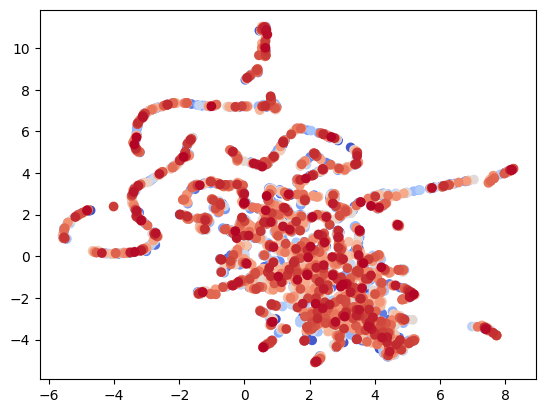

In [132]:
plt.scatter(umap_results[:, 0], umap_results[:, 1], c=data.iloc[:, 0], cmap='coolwarm')
plt.show()


---

## 🎯 Note: Clustering Accuracy Evaluation


The clustering accuracy metric evaluates how well the predicted clusters match the true clusters, irrespective of the specific labels or names assigned to the clusters.

This means that the evaluation focuses solely on the correct grouping of data points rather than the numerical labels of the clusters themselves.

## Key Characteristics

- **Name-Independent**: The metric cares only about how well the data points are grouped together, not the specific numerical or categorical labels used for the clusters.
- **Focus on Grouping**: The evaluation rewards cluster assignments that correctly group the same data points together, regardless of the specific labels assigned.

### Example

If the true cluster assignments are:

```
[0, 0, 0, 1, 1, 1]
```

and your predicted cluster assignments are:

```
[1, 1, 1, 0, 0, 0]
```

the accuracy will still be **1.0** because the grouping of points is identical, even though the numerical labels are swapped.

## How the Metric is Computed

1. **Contingency Matrix**: 
   - Construct a contingency matrix that represents the overlap between the true clusters and the predicted clusters.

2. **Optimal Correspondence**: 
   - Use an optimization algorithm, such as the Hungarian method (linear sum assignment), to find the best possible correspondence between true and predicted labels, maximizing the number of correctly assigned data points.

3. **Accuracy Calculation**: 
   - Calculate the accuracy as the ratio of correctly matched data points to the total number of data points.

> This approach ensures that the evaluation is based on **cluster completeness** and **homogeneity**, rewarding cluster assignments that correctly group the same data points together, regardless of the specific labels used.

---

In [56]:
from typing import Any
import numpy as np
import sklearn.metrics
import scipy.optimize

def calculate_clustering_accuracy(true_labels: np.ndarray, cluster_labels: np.ndarray) -> float:
    """
    Calculate the clustering accuracy between true labels and cluster labels.

    The function constructs a contingency matrix between the true labels and cluster labels.
    It then uses the Hungarian algorithm (also known as linear sum assignment) to find the
    best matching between the cluster labels and true labels. The clustering accuracy is 
    calculated as the number of correctly matched labels divided by the total number of labels.

    Args:
        true_labels (np.ndarray): An array of true labels for each data point.
        cluster_labels (np.ndarray): An array of cluster labels predicted by a clustering algorithm.

    Returns:
        float: The clustering accuracy, a value between 0 and 1 representing the proportion of 
               correctly matched labels.
    
    Example:
        >>> true_labels = np.array([0, 1, 2, 0, 1, 2])
        >>> cluster_labels = np.array([1, 2, 0, 1, 2, 0])
        >>> calculate_clustering_accuracy(true_labels, cluster_labels)
        1.0

    Raises:
        ValueError: If true_labels and cluster_labels are not of the same length.
    """
    # Check if the input labels are of the same length
    if true_labels.size != cluster_labels.size:
        raise ValueError("true_labels and cluster_labels must have the same length.")

    # Construct a contingency matrix where each cell [i, j] indicates the number of points with 
    # true label i and cluster label j.
    contingency_matrix = sklearn.metrics.cluster.contingency_matrix(true_labels, cluster_labels)
    
    # Find the best matching between true labels and cluster labels using the Hungarian algorithm.
    # We negate the contingency matrix because linear_sum_assignment finds the minimum cost assignment.
    row_ind, col_ind = scipy.optimize.linear_sum_assignment(-contingency_matrix)
    
    # Calculate the number of correctly assigned labels according to the optimal matching.
    correct_pairs = contingency_matrix[row_ind, col_ind].sum()
    
    # Compute the clustering accuracy as the ratio of correctly matched labels to total labels.
    accuracy = correct_pairs / true_labels.size

    return accuracy


In [57]:
true_labels = np.array([0, 1, 2, 0, 1, 2])
cluster_labels = np.array([1, 2, 0, 1, 2, 0])
calculate_clustering_accuracy(true_labels, cluster_labels)

1.0

In [65]:
true_labels = np.array([0, 0, 0, 0, 0, 0])
cluster_labels = np.array([1, 2, 0, 1, 2, 0])
calculate_clustering_accuracy(true_labels, cluster_labels)

0.3333333333333333

In [67]:
true_labels = np.array([1, 1, 1, 2, 2, 2])
cluster_labels = np.array([0, 0, 0, 0, 0, 0])
calculate_clustering_accuracy(true_labels, cluster_labels)

0.5